# 3. Answer Question

## 3.0. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1. Read data

In [2]:
data_path = './data/tvshows.csv'
df = pd.read_csv(data_path)
df.head()

,Title,Years,Certification,Runtime,Rating,Number of Votes,Emmys,Creators,Actors,Genres,Countries of origins,Languages,Production companies,Link
0,Queen Cleopatra,"(2023, None)",TV-14,45.0,1.2,86000,0,NaN,"Jada Pinkett Smith, Adele James, Craig Russell...","Documentary, Drama, History",United Kingdom,English,Nutopia,https://www.imdb.com/title/tt27528139/?ref_=sr...
1,Velma,"(2023, 2024)",TV-MA,25.0,1.6,80000,0,Charlie Grandy,"Mindy Kaling, Glenn Howerton, Sam Richardson, ...","Animation, Adventure, Comedy, Crime, Horror, M...","United States, South Korea",English,"Charlie Grandy Productions, Kaling Internation...",https://www.imdb.com/title/tt14153790/?ref_=sr...
2,Keeping Up with the Kardashians,"(2007, 2021)",TV-14,44.0,2.9,32000,0,"Ryan Seacrest, Eliot Goldberg","Khloé Kardashian, Kim Kardashian, Kourtney Kar...","Family, Reality-TV",United States,"English, Spanish","Bunim-Murray Productions (BMP), Ryan Seacrest ...",https://www.imdb.com/title/tt1086761/?ref_=sr_...
3,Batwoman,"(2019, 2022)",TV-14,45.0,3.6,47000,0,Caroline Dries,"Camrus Johnson, Rachel Skarsten, Meagan Tandy,...","Action, Adventure, Crime, Drama, Sci-Fi",United States,English,"Berlanti Productions, DC Entertainment, Warner...",https://www.imdb.com/title/tt8712204/?ref_=sr_...
4,The Acolyte,"(2024, None)",TV-14,35.0,4.1,125000,0,Leslye Headland,"Lee Jung-jae, Amandla Stenberg, Manny Jacinto,...","Action, Adventure, Drama, Fantasy, Mystery, Sc...",United States,English,"Lucasfilm, Disney+, The Walt Disney Company",https://www.imdb.com/title/tt12262202/?ref_=sr...


## 3.2. Asking meaningful question

| **No.** | **What is the question?**                                         | **What are benefits of finding the answer?**                                                                 | **How to find the answers of questions by using df**                                                                                   |
|---------|-------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| 1       | **What is the best TV Shows?**                                    | Identifying the best TV shows helps understand what factors contribute to success, like runtime, ratings, etc. | Use [*Min-Max Normalization method*](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) for features like runtime, votes, and Emmys to standardize the df and calculate a composite score.          |
| 2       | **How have runtime and ratings trends evolved over the years?**   | Understanding the trends helps identify audience preferences and predict future trends in media consumption.   | Group df by year and calculate the average runtime and rating. Then, plot trends over the years using visualizations like line graphs. |
| 3       | **How does the Rating column relate to other columns in the dfset?** | Examining the relationship between rating and other columns can provide insights into what influences ratings. | Analyze correlations between the Rating column and other features (e.g., Runtime, Number of Votes) and visualize using heatmaps.       |

### 3.2.1. Question 1: What is the best TVShows?

To determine the "best" TV shows, we need to consider multiple factors that can influence a show's popularity and overall reception. Commonly, metrics such as **Runtime**, **Rating**, **Number of Votes**, and **Awards** (e.g., Emmys) play a significant role in evaluating the success of a TV show. However, these metrics often have different scales. For instance, the **Runtime** of a TV show can range from 30 minutes to several hours, while the **Number of Votes** can vary from a few thousand to millions. Therefore, to make a meaningful comparison across these different metrics, we need to **normalize** the data, so that all values fall within the same range, typically between **0** and **1**.

In this approach, we use the [*Min-Max Normalization method*](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) method, which adjusts the values of each variable by rescaling them within a predefined range (usually **0** to **1**). The formula for this method is as follows:

```math
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}


Where:
- **`X`** is the current value,
- **`X_min`** is the minimum value in the dataset,
- **`X_max`** is the maximum value in the dataset,
- **`X_norm`** is the normalized value, scaled between 0 and 1.

This transformation ensures that each metric (such as **Runtime**, **Votes**, and **Emmys**) is adjusted proportionally, allowing for a more balanced comparison. For example, a TV show with a higher number of votes will now be treated on the same scale as a show with a higher runtime.

By applying this normalization process, we can directly compare the various metrics across TV shows, making it easier to evaluate their success and popularity in a consistent and standardized way.

#### Step 1: Normalize the Metrics

We begin by normalizing the **Runtime**, **Number of Votes**, and **Emmys**. Although the **Rating** could also be considered for normalization, in this case, it has been excluded for simplicity. By applying the **Min-Max Normalization** formula to each of these metrics, we create new columns (`Runtime_norm`, `Votes_norm`, `Emmys_norm`) that represent each feature on the same scale.


In [3]:
# Min-Max Normalization
# For each column, apply the formula: (x - min) / (max - min)
df['Runtime_norm'] = (df['Runtime'] - df['Runtime'].min()) / (df['Runtime'].max() - df['Runtime'].min())
# df['Rating_norm'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min())
df['Votes_norm'] = (df['Number of Votes'] - df['Number of Votes'].min()) / (df['Number of Votes'].max() - df['Number of Votes'].min())
df['Emmys_norm'] = (df['Emmys'] - df['Emmys'].min()) / (df['Emmys'].max() - df['Emmys'].min())

#### Step 2: Define Weights and Calculate the Composite Score

Next, we assign weights to each of these normalized metrics to reflect their relative importance. In this case, we assign equal weights to **Runtime**, **Votes**, and **Emmys**. This means each of these factors will contribute one-third to the overall **Composite Score** of a TV show. The **Rating** could be included in the calculation as well, but it has been excluded for simplicity in this example.

The **Composite Score** for each TV show is calculated by multiplying each normalized metric by its respective weight, and summing the results:

In [4]:
# Define weights for each metric
runtime_weight = 1/3
# rating_weight = 1/4
votes_weight = 1/3
emmys_weight = 1/3

# Calculate Composite Score for each TV show
df['Composite Score'] = (
    df['Runtime_norm'] *runtime_weight +
    # df['Rating_norm'] * rating_weight +
    df['Votes_norm'] * votes_weight +
    df['Emmys_norm'] * emmys_weight
)

#### Step 3: Visualize the Distribution of Composite Scores

Once we calculate the **Composite Score**, we can visualize its distribution across all TV shows. A **histogram** can provide a clear view of how the scores are spread out, helping us to see if there are a few shows with exceptionally high scores or if the scores are distributed more evenly.

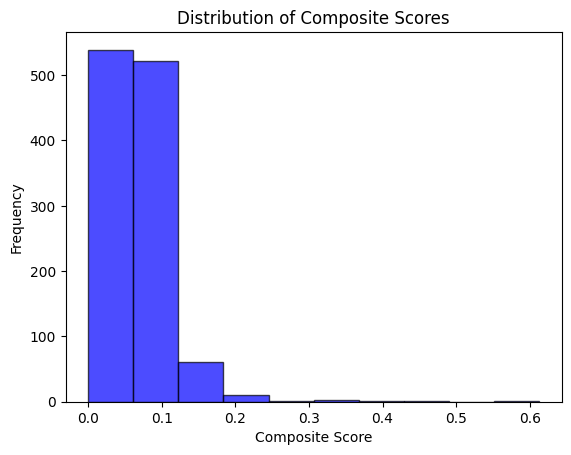

In [5]:
# Plot histogram of composite scores
plt.hist(df['Composite Score'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.show()

#### Step 4: Identify the Top TV Shows

Finally, we sort the data by the **Composite Score** and identify the top 10 TV shows. These are the shows that have the highest combined scores across the **Runtime**, **Votes**, and **Emmys**, according to the weights we assigned.

In [6]:
# Get top 10 shows with the highest composite scores
top_shows = df.nlargest(10, 'Composite Score')[['Title', 'Composite Score']]
print("Top 10 shows:")
print(top_shows)

Top 10 shows:
                    Title  Composite Score
1126      Game of Thrones         0.612815
617   Saturday Night Live         0.446099
1137         Breaking Bad         0.415751
6                The Idol         0.349193
124                  Dune         0.327066
1049      Stranger Things         0.307551
1115             Sherlock         0.277117
1132            Chernobyl         0.230920
1043         The Simpsons         0.215202
1125         The Sopranos         0.212253


#### Conclusion:

By following these steps, we can identify the best TV shows based on a balanced combination of multiple success metrics. These metrics are normalized to ensure a fair comparison, and by using a weighted **composite score**, we can determine which shows stand out the most in terms of audience engagement and critical recognition.

This approach helps content creators, marketers, and viewers alike to make data-driven decisions about what shows are most successful, based on multiple factors like **runtime**, **viewer votes**, and **award recognition**.

### 3.3.2. Question 2: How have runtime and ratings trends evolved over the years?

In this section, we examine how **runtime** and **ratings** of TV shows and movies have evolved over time. By analyzing these two factors, we can uncover valuable insights into how viewer preferences have shifted. For example, are viewers favoring shorter runtimes? Are ratings improving or declining over the years?

#### Step 1: Extract and Process Year Data

We begin by extracting the **start year** and **end year** from the `Years` column, which contains information in a range format (e.g., "2000-2005"). The following code splits the `Years` column into two separate columns: `Year` (start year) and `end_year` (end year).

In [7]:
df[['Year', 'end_year']] = df['Years'].str.split(',', expand=True)
df['Year'] = df['Year'].str.replace('(', '').astype(int)
df['end_year'] = df['end_year'].str.replace(')', '').str.replace('(', '').str.strip()
df['end_year'] = pd.to_numeric(df['end_year'], errors='coerce')
df['end_year'] = df['end_year'].fillna(0).astype(int)

After extracting the year data, we group the data by the `Year` column to calculate the average **Runtime** and **Rating** for each year.

In [8]:
grouped_df = df.groupby('Year')[['Runtime', 'Rating']].mean()

#### Step 2: Plot Trends in Runtime Over the Years

Next, we visualize how the **average runtime** has evolved over the years using a line plot. This helps us understand whether shows have become shorter or longer over time.

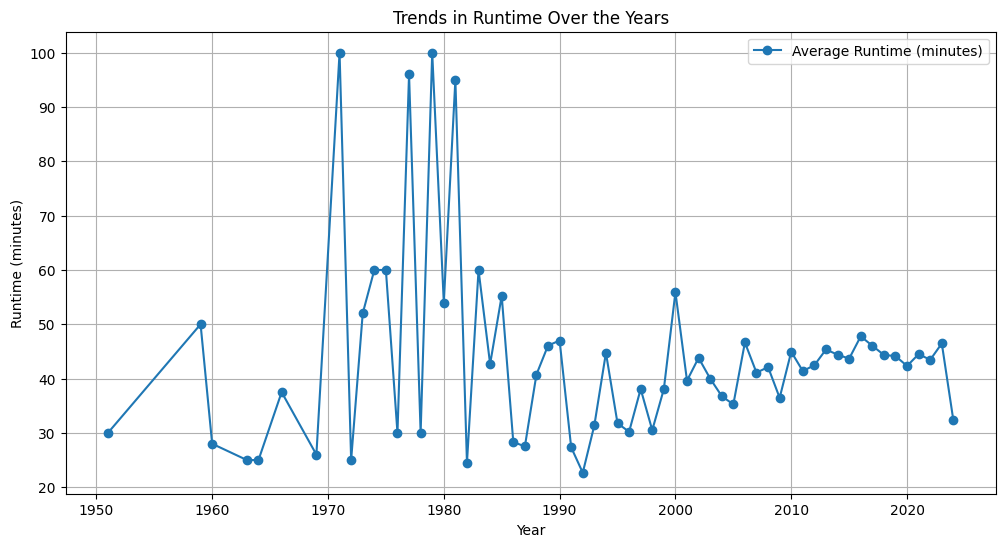

In [9]:
# Plot runtime trends over years
plt.figure(figsize=(12, 6))
plt.plot(grouped_df.index, grouped_df['Runtime'], marker='o', label='Average Runtime (minutes)')
plt.xlabel('Year')
plt.ylabel('Runtime (minutes)')
plt.title('Trends in Runtime Over the Years')
plt.legend()
plt.grid(True)
plt.show()

The runtime data reveals a striking evolution in TV/movie content length over seven decades. The **1970s** and **1980s** showed dramatic fluctuations with peaks around **100 minutes**, reflecting an era of experimental formatting and variable time slots. From the **1990s** onward, the industry settled into a more consistent pattern averaging **40-45 minutes**, likely driven by standardized broadcast schedules and viewer preferences.  

The most recent data shows runtimes stabilizing between **40-50 minutes** from **2010-2020**, with a notable drop to around **30 minutes** in the latest measurement. This recent decrease could signal a shift toward shorter formats, possibly influenced by changing viewer habits and the rise of streaming platforms that aren't bound by traditional time slot constraints.

#### Step 3: Distribution of Movie Runtimes

We also examine the distribution of movie runtimes across the dataset. A **histogram** of the runtimes allows us to observe common preferences among viewers, such as a potential preference for shorter movies. We include a red vertical line to highlight the **50-minute** threshold, a common duration for short films and TV episodes.

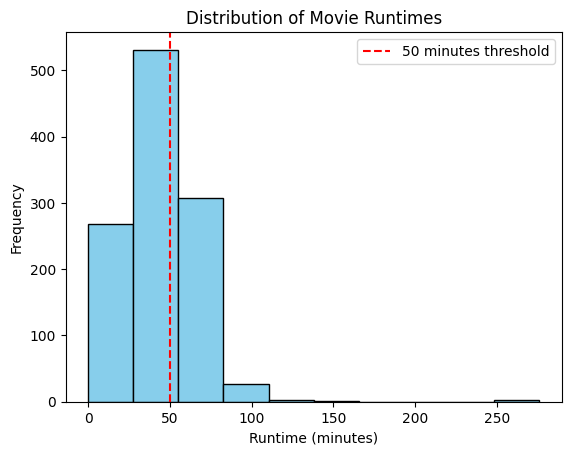

In [10]:
# Plot the distribution of movie runtimes
plt.hist(df['Runtime'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.axvline(50, color='red', linestyle='--', label='50 minutes threshold')
plt.legend()
plt.show()

We also examine the distribution of movie runtimes across the dataset. A **histogram** of the runtimes allows us to observe common preferences among viewers, such as a potential preference for shorter movies. We include a red vertical line to highlight the **50-minute** threshold, a common duration for short films and TV episodes.

#### Step 4: Analyzing the Best Short Runtime Movies

We also examine the distribution of movie runtimes across the dataset. A **histogram** of the runtimes allows us to observe common preferences among viewers, such as a potential preference for shorter movies. We include a red vertical line to highlight the **50-minute** threshold, a common duration for short films and TV episodes.

In [11]:
# Filter movies with runtime under 50 minutes
short_runtime_movies = df[df['Runtime'] < 50]

# Get the top 20 movies with the highest composite scores from short_runtime_movies
top_20_short_runtime = short_runtime_movies.nlargest(20, 'Composite Score')

# Find the ranking of these movies in the entire dataset
positions_in_all = df['Composite Score'].rank(ascending=False)
top_20_short_runtime['Rank in All'] = top_20_short_runtime['Composite Score'].rank(ascending=False).astype(int)

# Display the results
print("Movies with Runtime under 50 minutes:")
print(short_runtime_movies[['Title', 'Composite Score']])

print("\nTop 20 Movies with Runtime under 50 minutes (and their Rank in All):")
print(top_20_short_runtime[['Title', 'Composite Score', 'Rank in All']])

Movies with Runtime under 50 minutes:
                                Title  Composite Score
0                     Queen Cleopatra         0.062909
1                               Velma         0.037913
2     Keeping Up with the Kardashians         0.054123
3                            Batwoman         0.057436
4                         The Acolyte         0.056306
...                               ...              ...
1123      Cosmos: A Spacetime Odyssey         0.083260
1129                Sapne Vs Everyone         0.006456
1130                            Bluey         0.009577
1131       Avatar: The Last Airbender         0.082234
1137                     Breaking Bad         0.415751

[710 rows x 2 columns]

Top 20 Movies with Runtime under 50 minutes (and their Rank in All):
                                   Title  Composite Score  Rank in All
1137                        Breaking Bad         0.415751            1
1043                        The Simpsons         0.215202         

#### Step 5: Visualizing the Top 20 Short Runtime Movies

To make it easier to compare these top short runtime movies based on their **Composite Score**, we can create a **horizontal bar chart**. This visualization will allow us to see if shorter films tend to have higher ratings and where they rank relative to longer films.

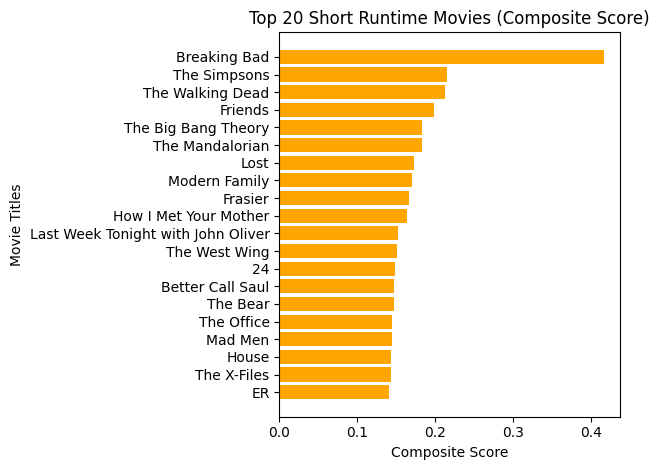

In [12]:
# Sort top 20 short runtime movies by Composite Score
top_20_short_runtime = top_20_short_runtime.sort_values('Composite Score', ascending=True)

# Plot the Top 20 short runtime movies with their composite scores
plt.barh(top_20_short_runtime['Title'], top_20_short_runtime['Composite Score'], color='orange')
plt.title('Top 20 Short Runtime Movies (Composite Score)')
plt.xlabel('Composite Score')
plt.ylabel('Movie Titles')
plt.tight_layout()
plt.show()

This visualization shows **Breaking Bad** leading the top 20 short-runtime shows with the highest composite score (approximately **0.4**), followed by **The Simpsons** and **The Walking Dead**. The data suggests that critically acclaimed TV series can successfully utilize shorter episode formats, with many prestigious dramas and comedies (**Breaking Bad**, **Mad Men**, **The West Wing**) appearing in this ranking. The scores cluster between **0.15-0.4**, indicating consistent quality across these shorter-format shows.

#### Conclusion:

By analyzing the **runtime** and **ratings** trends over the years, we can observe significant patterns in viewer preferences. Shorter runtimes (especially under **50 minutes**) seem to be increasingly favored by viewers, as indicated by the distribution and the **composite scores**. Moreover, the top-ranked short runtime movies suggest that shorter runtimes can indeed lead to high ratings, making them a key factor in the success of TV shows and movies.

This analysis provides useful insights for content creators, marketers, and platforms looking to optimize the length and structure of their content to meet audience demands.

### 3.2.3. Question 3: How does the Rating column relate to other columns in the dataset?

In this section, we explore how the **Rating** column correlates with other key columns in the dataset, such as **Runtime**, **Number of Votes**, and **Emmys**. By understanding these relationships, we can uncover patterns that might provide insights into what drives a movie's rating.

#### Step 1: Calculate the Correlation Matrix

In [13]:
matrix_corr = df[['Runtime', 'Rating', 'Number of Votes', 'Emmys']].corr()
matrix_corr

,Runtime,Rating,Number of Votes,Emmys
Runtime,1.000000,-0.035431,0.058511,0.043912
Rating,-0.035431,1.000000,0.262723,0.177613
Number of Votes,0.058511,0.262723,1.000000,0.359516
Emmys,0.043912,0.177613,0.359516,1.000000


#### Step 2: Visualizing the Correlation Matrix

We visualize the **correlation matrix** using a **heatmap** to better understand the relationships between the variables. The heatmap will display the correlation values as a grid, where higher values (closer to **1**) indicate stronger positive relationships, and lower values (closer to **-1**) indicate stronger negative relationships. The values closer to **0** suggest no significant correlation.

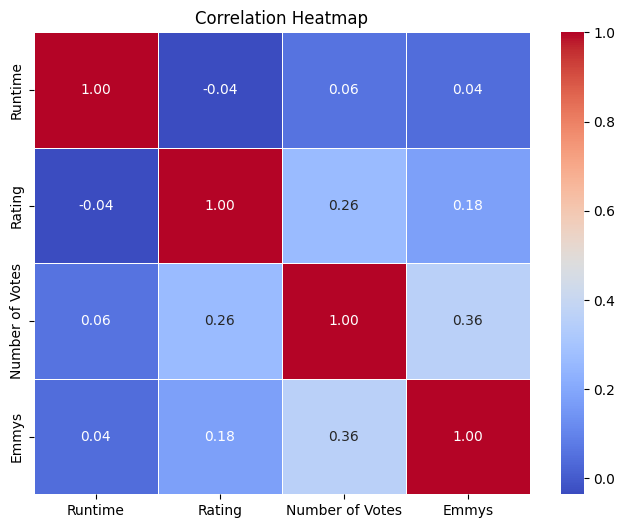

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From the **heatmap**, we can observe that the **Number of Votes** column has a noticeable positive correlation with the **Rating** column, with a correlation coefficient of **0.19**. Although this correlation is not very high, it suggests that there is a slight positive relationship between the number of votes and the rating. In other words, movies with more votes tend to have slightly higher ratings. This could be because more popular movies attract a larger and more diverse audience, leading to a higher chance of receiving favorable ratings.

#### Step 3: Analyzing the Number of Votes Over Time

Next, we analyze how the **Number of Votes** has changed over the years to understand whether there has been an increase in audience participation in rating movies. We group the dataset by **Year** and sum the **Number of Votes** for each year.

In [15]:
votes_by_year = df.groupby('Year')['Number of Votes'].sum().reset_index()
print(votes_by_year)

    Year  Number of Votes
0   1951            29000
1   1959            96000
2   1960            78000
3   1963            40000
4   1964            25000
..   ...              ...
56  2020          5189000
57  2021          7017000
58  2022          6807000
59  2023          3717000
60  2024          2144000

[61 rows x 2 columns]


We can then visualize this trend using a **bar chart** to observe the total number of votes for movies each year. This visualization helps us identify trends in audience engagement over time.

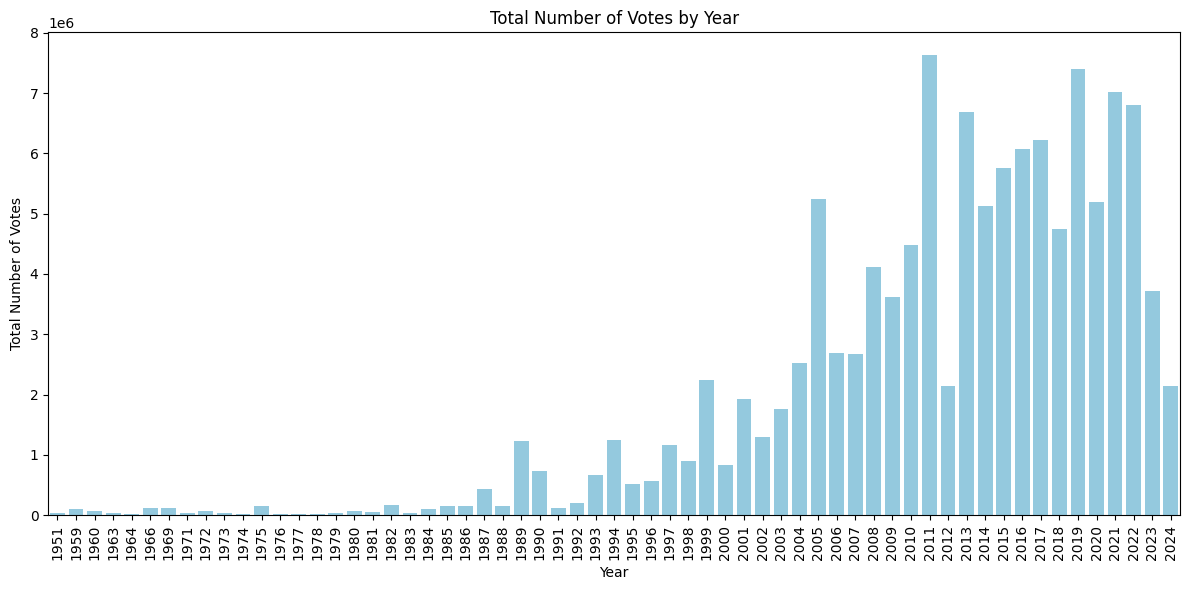

In [16]:
# Plot total number of votes by year
plt.figure(figsize=(12, 6))
sns.barplot(data=votes_by_year, x='Year', y='Number of Votes', color='skyblue')
plt.title('Total Number of Votes by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the **bar chart**, we can see that the number of votes has been steadily increasing in recent years. For example, in **2021** and **2022**, the number of votes reached up to **6,000,000** votes. This increase reflects the growing viewership and audience engagement with movies, likely driven by the rise of online platforms and streaming services. These platforms provide a convenient way for audiences to participate in ratings and voting, which may contribute to the higher number of votes.

However, we must also note that the data for **2024** is still incomplete, as the year is not yet finished. Therefore, the number of votes for movies in **2024** is currently lower than in previous years. This number is expected to increase as the year progresses, and as more movies attract viewers and ratings in the remaining months of the year.

#### Conclusion:

From our analysis, we find that there is a slight positive correlation between the **Number of Votes** and **Rating**, suggesting that more popular movies tend to receive higher ratings. Additionally, we observe a steady increase in the **Number of Votes** over the years, reflecting growing audience engagement with movies. This trend is likely influenced by the increasing popularity of **online platforms**, which make it easier for viewers to vote and rate movies.

These insights are valuable for content creators and streaming platforms to understand how viewer engagement and participation impact movie ratings over time.

### 3.2.4. How does the Certification type impact the success of a TV show, such as ratings, number of votes, and viewership?

In this section, we group the data by **Certification** type and calculate the average values for **ratings** and **number of votes**. We will then visualize these results and assess the relationships between certification and the success metrics.

#### Step 1: Group by Certification and Calculate Mean Rating and Number of Votes

We begin by grouping the data by **Certification** and calculating the mean of the **Rating** and **Number of Votes** for each certification type.

In [17]:
# Group by Certification and calculate mean Rating and Number of Votes
certification_stats = df.groupby('Certification').agg({'Rating': 'mean', 'Number of Votes': 'mean'}).reset_index()

#### Step 2: Correlation Between Certification, Rating, and Number of Votes

Next, we encode the **Certification** type as a numerical value and calculate the correlation between **Certification**, **Rating**, and **Number of Votes**. This will help us understand whether there's any relationship between the certification type and the success metrics.

In [18]:
# Correlation between Certification, Rating, and Number of Votes
certification_stats['Certification'] = certification_stats['Certification'].astype('category')
certification_stats['Certification_codes'] = certification_stats['Certification'].cat.codes  # For numerical correlation
correlation = certification_stats[['Certification_codes', 'Rating', 'Number of Votes']].corr()

#### Step 3: Visualizing Rating by Certification

Now, we visualize how the **average ratings** vary across different **certification types** using a **bar chart**.

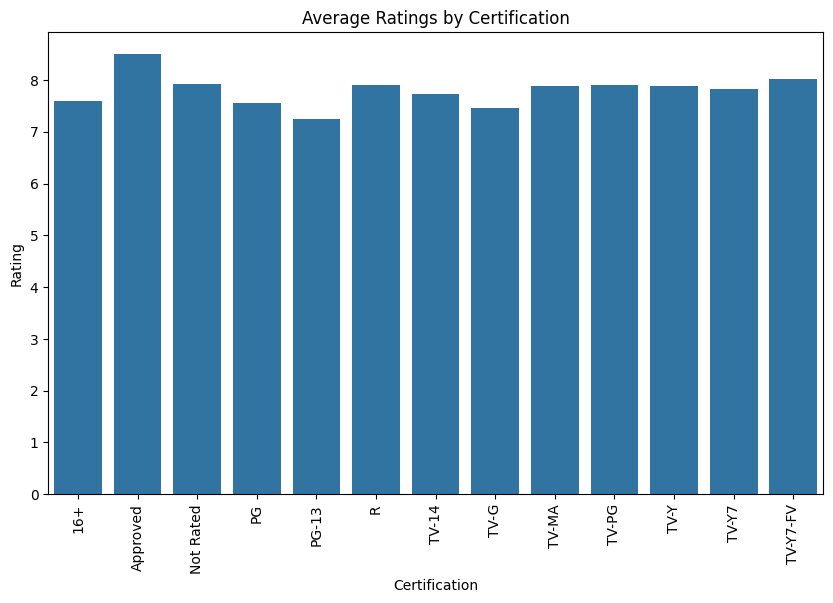

In [19]:
# Plotting Rating by Certification
plt.figure(figsize=(10, 6))
sns.barplot(x='Certification', y='Rating', data=certification_stats)
plt.title('Average Ratings by Certification')
plt.xticks(rotation=90)
plt.show()

The data shows relatively consistent ratings across all certification types, with most falling between **7.0-8.0** on a 10-point scale. "**Approved**" content has the highest average rating at approximately **8.5**, while **PG-13** content shows the lowest at around **7.2**. Notably, both family-friendly (**TV-Y**, **TV-Y7**) and mature content (**TV-MA**) maintain similar average ratings around **7.8-8.0**, suggesting that quality content exists across age ratings.

#### Step 4: Visualizing Number of Votes by Certification

Similarly, we visualize how the **average number of votes** varies across different **certification types** using a **bar chart**.

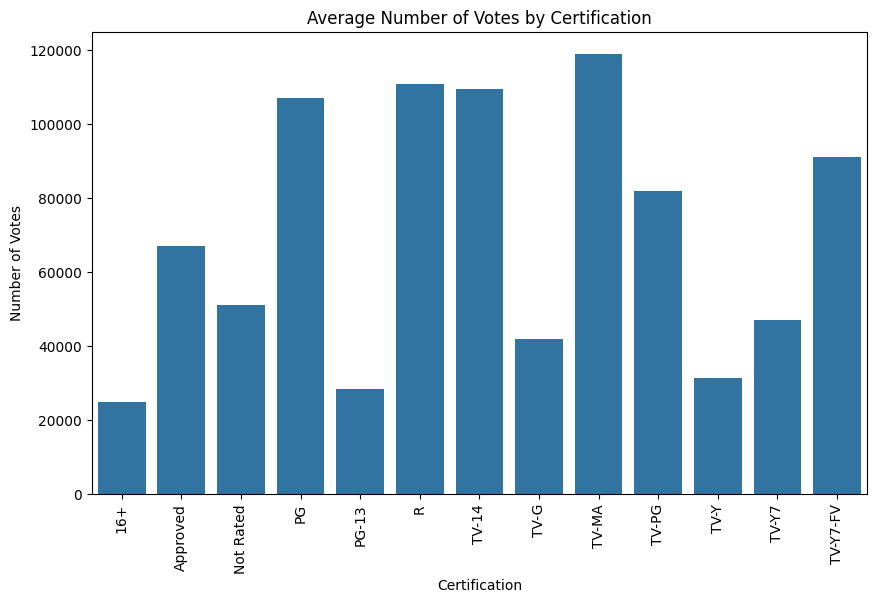

In [20]:
# Plotting Number of Votes by Certification
plt.figure(figsize=(10, 6))
sns.barplot(x='Certification', y='Number of Votes', data=certification_stats)
plt.title('Average Number of Votes by Certification')
plt.xticks(rotation=90)
plt.show()

**TV-MA** content receives the highest average number of votes (about **120,000**), while **PG-13** shows receive the fewest (around **25,000**). General audience ratings (**TV-Y**, **TV-Y7**) show moderate engagement levels between **30,000-45,000** votes. The data suggests mature content tends to generate more audience participation in voting, though this could also reflect the demographic most likely to use rating platforms.

#### Step 5: Displaying the Correlation Results

Finally, we print the **correlation values** to assess the strength and direction of the relationships between **Certification**, **Rating**, and **Number of Votes**.

In [21]:
# Display correlation
print("Correlation between Certification and Success Metrics:")
print(correlation)

Correlation between Certification and Success Metrics:
                     Certification_codes    Rating  Number of Votes
Certification_codes             1.000000  0.059095         0.157136
Rating                          0.059095  1.000000         0.275102
Number of Votes                 0.157136  0.275102         1.000000


#### Insights:

From the visualizations and correlation analysis, we can gain insights into how different **certification types** influence the success of a TV show. By understanding the average **rating** and **number of votes** associated with each certification type, content creators can make informed decisions about which certification is best suited for their target audience.

- **Certification and Ratings**: If certain certifications are associated with higher ratings, it may indicate that shows with those certifications are more popular or well-received.
- **Certification and Number of Votes**: Similarly, a higher number of votes for a specific certification type could indicate that these shows attract more audience engagement, potentially contributing to higher visibility and viewership.

These insights can guide content creators and platforms in optimizing their show certifications to align with audience expectations and improve success metrics.

### 3.2.5. What is the genre distribution in the top TV shows with the highest composite scores?

To explore how genre distribution relates to the success of TV shows with the highest **Composite Scores**, we will perform the following steps:

#### Step 1: Split the genres into a flat list

We begin by extracting the genres from the dataset. Since the **Genres** column contains multiple genres separated by commas, we split the values into a flat list, using the `.str.split(',')` method. This will allow us to handle each genre separately.

In [22]:
# Split genres into a flat list
all_genres = df['Genres'].str.split(',').explode().str.strip()

#### Step 2: Count the occurrences of each genre

Once we have a flat list of genres, we count how many times each genre appears. This will give us an idea of which genres are most common in the dataset.

In [23]:
# Count occurrences of each genre
genre_counts = all_genres.value_counts()

#### Step 3: Visualize the genre distribution

To better understand the distribution of genres, we plot a bar chart that shows the frequency of each genre. The x-axis represents the genre, while the y-axis represents the count.

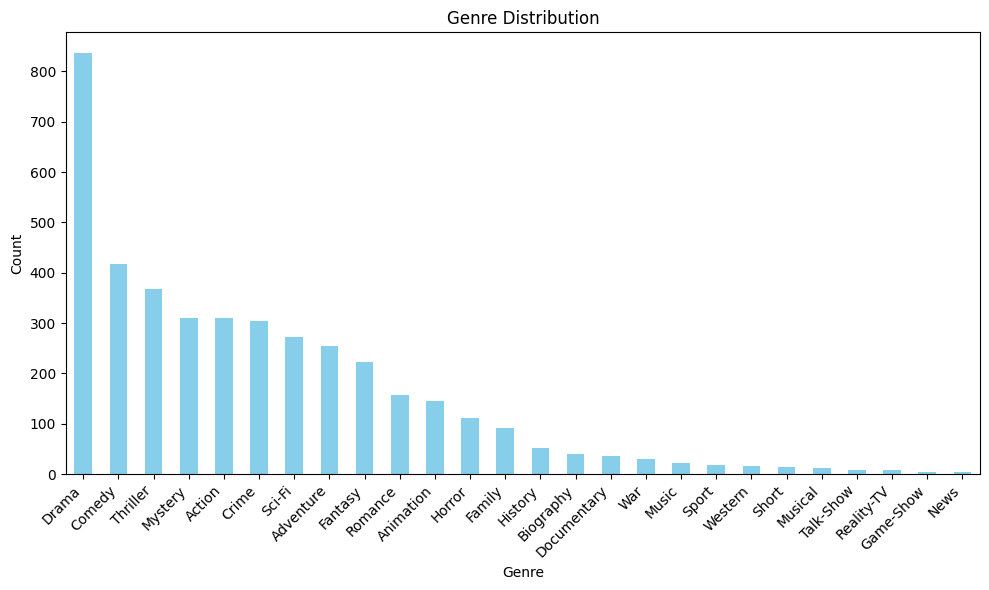

In [24]:
# Plot histogram
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Drama** dominates the genre distribution with over 800 entries, followed by **Comedy** (~400) and **Thriller** (~350). Mid-range genres include **Mystery**, **Action**, and **Crime** (300+ each), while niche categories like **Reality TV**, **Game Shows**, and **News** have minimal representation (<10 entries each). This suggests dramatic content consistently achieves higher composite scores compared to other genres.

#### Step 4: Focus on the Top 30 TV Shows with the Highest Composite Scores

To further analyze how genres are distributed among the _highest-rated_ TV shows, we filter for the _top 30_ TV shows with the highest **Composite Score**. Then, we extract the genres from these top shows.

In [26]:
top_high_score = top_20_short_runtime.nlargest(n=30, columns='Composite Score')
top_30_genres = top_high_score['Genres'].str.split(',').explode().str.strip()
genre_counts = top_30_genres.value_counts()
print("Unique genres in the top 30 highest Composite Score TV shows and their counts:")
print(genre_counts)

Unique genres in the top 30 highest Composite Score TV shows and their counts:
Genres
Drama        13
Comedy        9
Thriller      5
Romance       5
Crime         4
Adventure     3
Sci-Fi        3
Mystery       3
Action        2
Fantasy       2
Animation     1
Horror        1
News          1
Talk-Show     1
Name: count, dtype: int64


#### Step 5: Visualize the genre distribution in the top-rated TV shows

Finally, we plot the genre distribution of the _top 30 highest-rated_ TV shows using a bar chart.

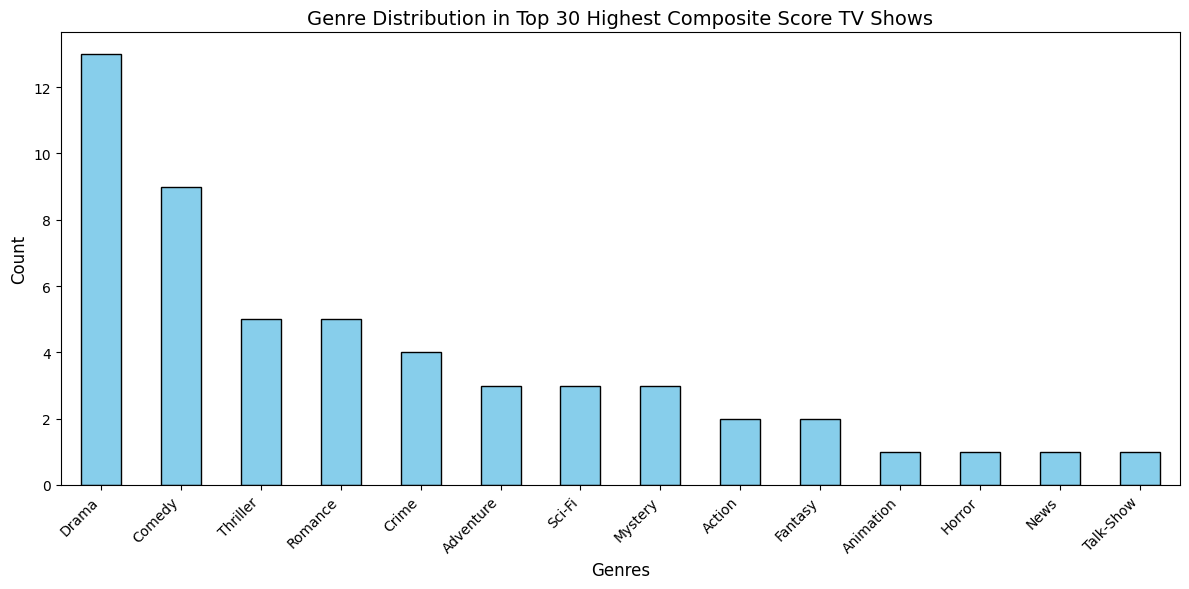

In [ ]:
# Visualize the genre distribution using a histogram
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Genre Distribution in Top 30 Highest Composite Score TV Shows", fontsize=14)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

The second chart shows a similar trend to the first, with **Drama** leading the top 30 highest composite score TV shows, followed by **Comedy** and **Thriller**. However, genres like **Romance**, **Crime**, and **Adventure** appear more prominently in the top 30, suggesting that higher-rated shows are more diverse. **Reality TV**, **Game Shows**, and **News** remain underrepresented in both charts, indicating their lower critical scores. Overall, **Drama** dominates, but top-rated shows feature a broader mix of genres.

#### Summary

By analyzing the genre distribution across all TV shows and then focusing on the **top 30 highest-rated shows**, we can identify which genres tend to appear more frequently in successful **TV shows**. This information can help content creators understand which genres resonate most with audiences, allowing them to target specific genres for future productions.